<a href="https://colab.research.google.com/github/WattEfird4/Projects/blob/main/Recell_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning - Foundations Project: ReCell

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released CONVERT TO DATETIME
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2]:
pip install nb_black --user

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl #additional plotting
mpl.rcParams['figure.dpi'] = 60 #high-res plotting / cleaner charts
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## Loading the dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/used_device_data.csv')


## Data Overview

In [4]:
original = df.copy()

In [5]:
#viewing the first 5 rows
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [6]:
#checking number of rows and columsn
print(f"The dataset has {original.shape[0]} rows and {original.shape[1]} columns")

The dataset has 3454 rows and 15 columns


In [7]:
#checking details of the variables and its type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f



*   The dataset has 15 columns which consist of object, float64, and int64 datatypes.
*   There are missing values in some of the columns.



In [8]:
#statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


- Android is the most used operating system.
- Screen size ranges from approximately 5 inches to 31 inches.
- The majority of phone owners have 4G compared to 5G.
- Megapixels range from 0 to 48 for main and selfie cameras.
- The avergae internal memory for phones is 54.57GB.
- The average amount of Ram is 4GB per phone.
- The average amount of energy capacity for phone battery is 3,133.40 mAh.
- 75% of the phones have an energy capacity of 4,000 mAh or less.
- Cell phone weight varies from 69 grams to 855 grams.
- Most of the phones were released around 2015-2016.
- THe average length of time the phones have been used is 675 days.
- The average normalized used price is £4.36 while the average normalized new price is £5.23.
- OS, 4g, and 5g are object datatype = these will need to be converted to numeric before modeling.

In [9]:
#correlation map
df.corr()

<ipython-input-9-ab3b66d1637d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

##Note
- I have included Bi-variate EDA with Univariate EDA.  EDA is also performed throughout answering the questions.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

In [10]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="darkorange"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="crimson", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Set1",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot



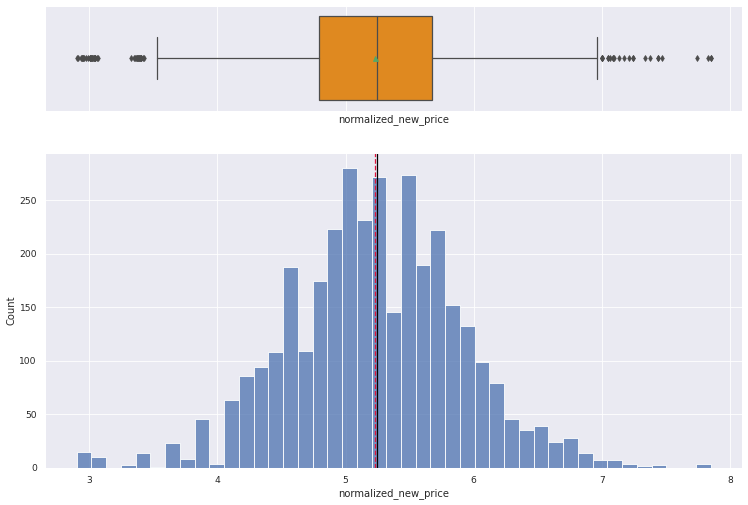

In [12]:
histogram_boxplot(original, 'normalized_new_price')

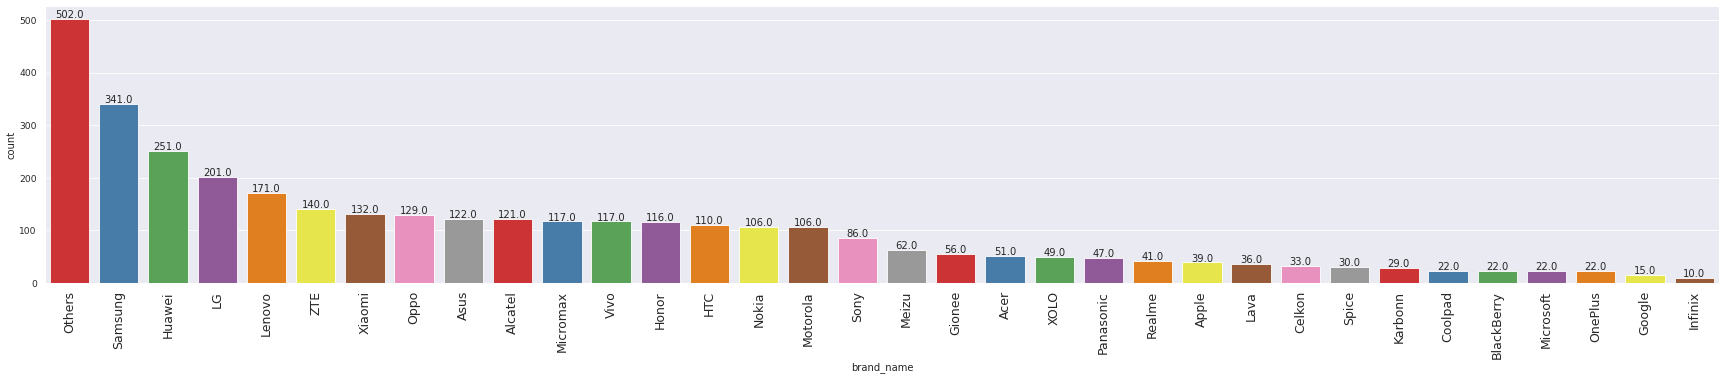

In [13]:
#barplot by brand name
labeled_barplot(df, 'brand_name')

Others has the most devices out of all the brands.

Others and Samsung are the most common brand name.

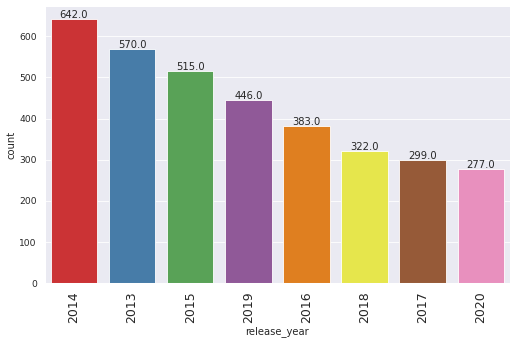

In [14]:
#phones by release year
labeled_barplot(df, 'release_year')

Most phones are from 2013-2015.

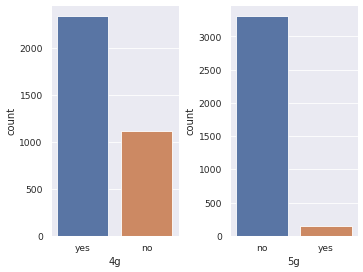

In [15]:
plt.subplot(1, 2, 1)
sns.countplot(x='4g', data=df)
plt.subplot(1, 2, 2)
sns.countplot(x='5g', data=df)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

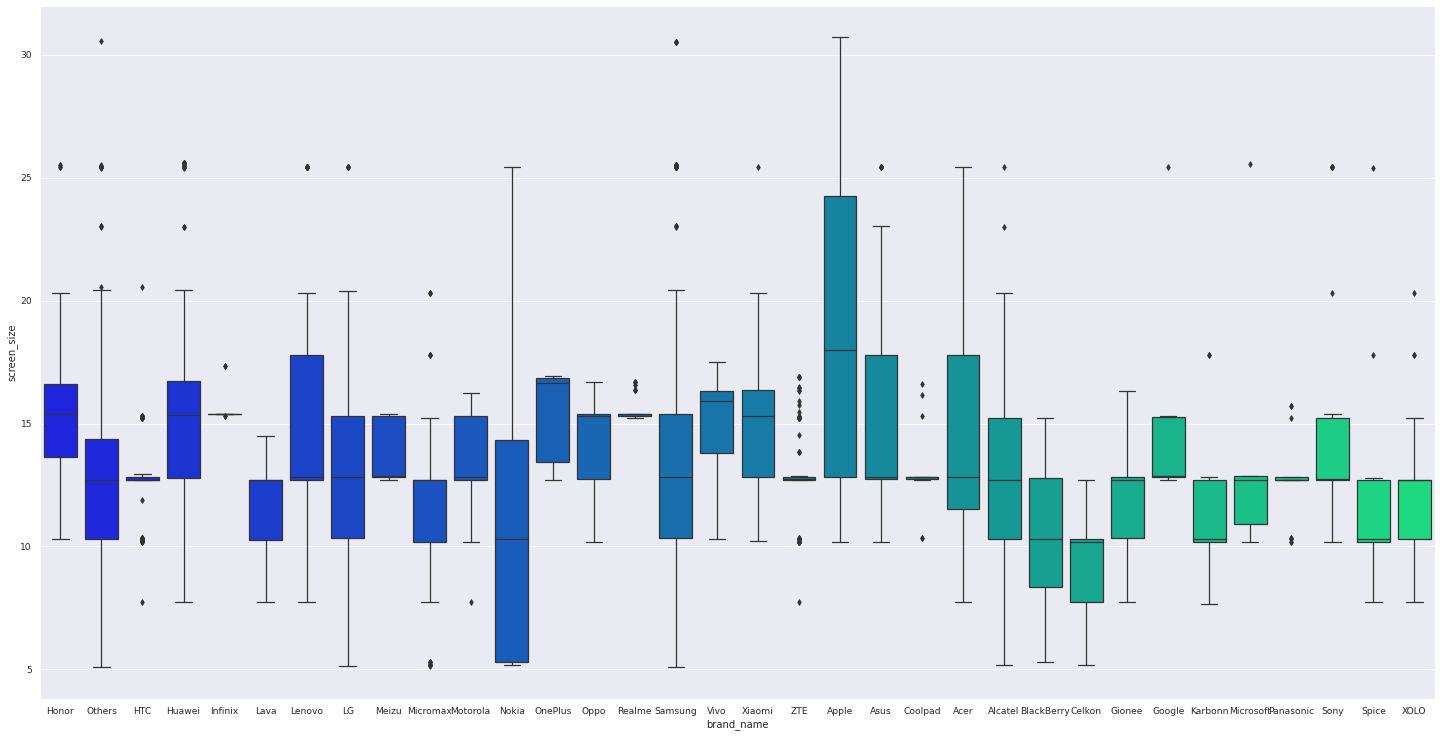

In [16]:
#brand_name and screen_size
plt.figure(figsize=(30, 15))
sns.boxplot(data=df, x="brand_name", y="screen_size", palette="winter")
plt.show()

Apple has the most variance when it comes to screen size.
Apple's average screen size for one of its devices is approximately 17cm

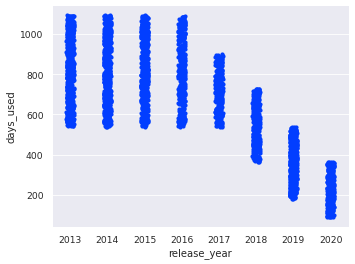

In [29]:
#release_year and days_used
sns.set_palette("bright")
plt.rc('grid', color='w', linestyle='solid')
sns.stripplot(x="release_year", y="days_used", data=df);

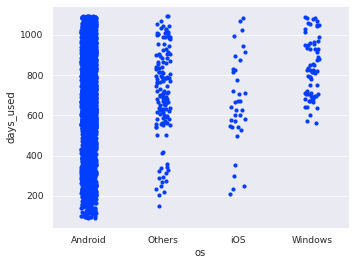

In [30]:
#operating system and days_used
sns.set_palette("bright")
plt.rc('grid', color='w', linestyle='solid')
sns.stripplot(x="os", y="days_used", data=df);

Android has more users that have used their device the least amount of time.
Windows users tend to have been using their phones the longest.

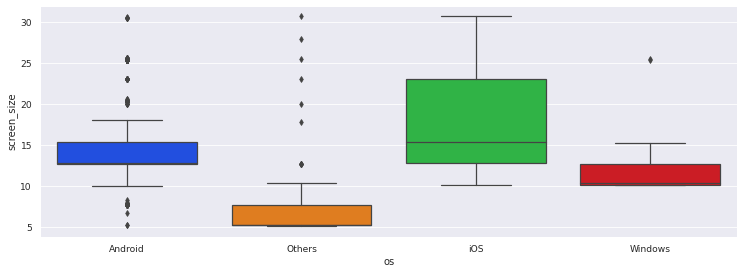

In [31]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="screen_size")
plt.show()

iOS devices have larger screen size than other operating systems.
This makes sense as Apple has the largest screen size by brand name.

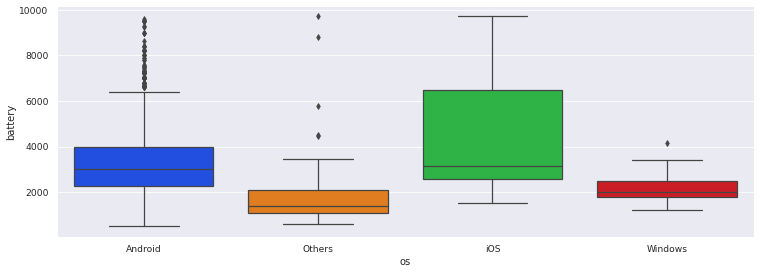

In [32]:
#battery size and operating system
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="os", y="battery")
plt.show()

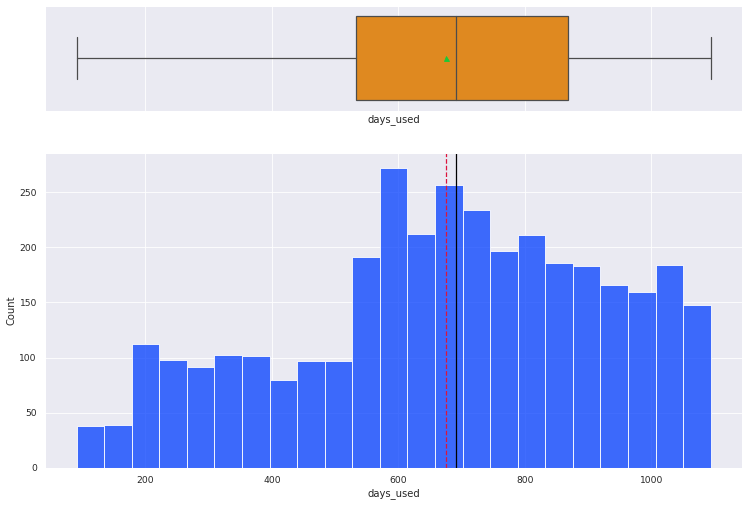

In [33]:
#days used distribution
histogram_boxplot(df, 'days_used')

On average, devices have been used a little over 600 days on average.  

In [34]:
sorted_days = df.groupby(["brand_name"])["days_used"].mean().sort_values().index

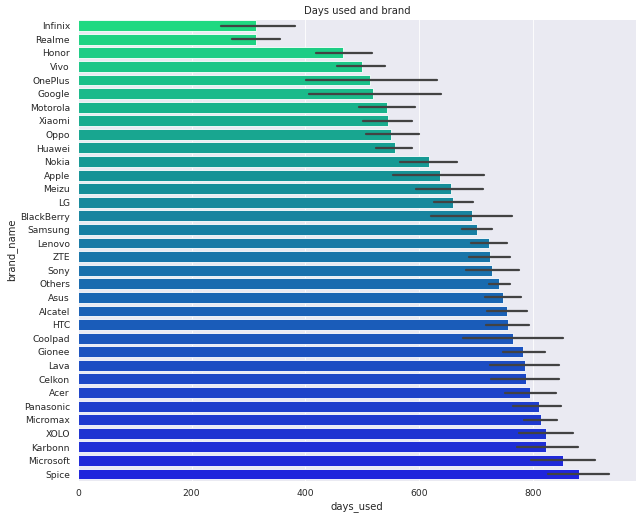

In [37]:
#Days used and brand name
plt.figure(figsize=(12,10))
sns.barplot(data=df, x='days_used', y='brand_name', order=sorted_days, palette='winter_r')
plt.title('Days used and brand')
plt.show()

Users of Spice devices tend use their devices the longest.

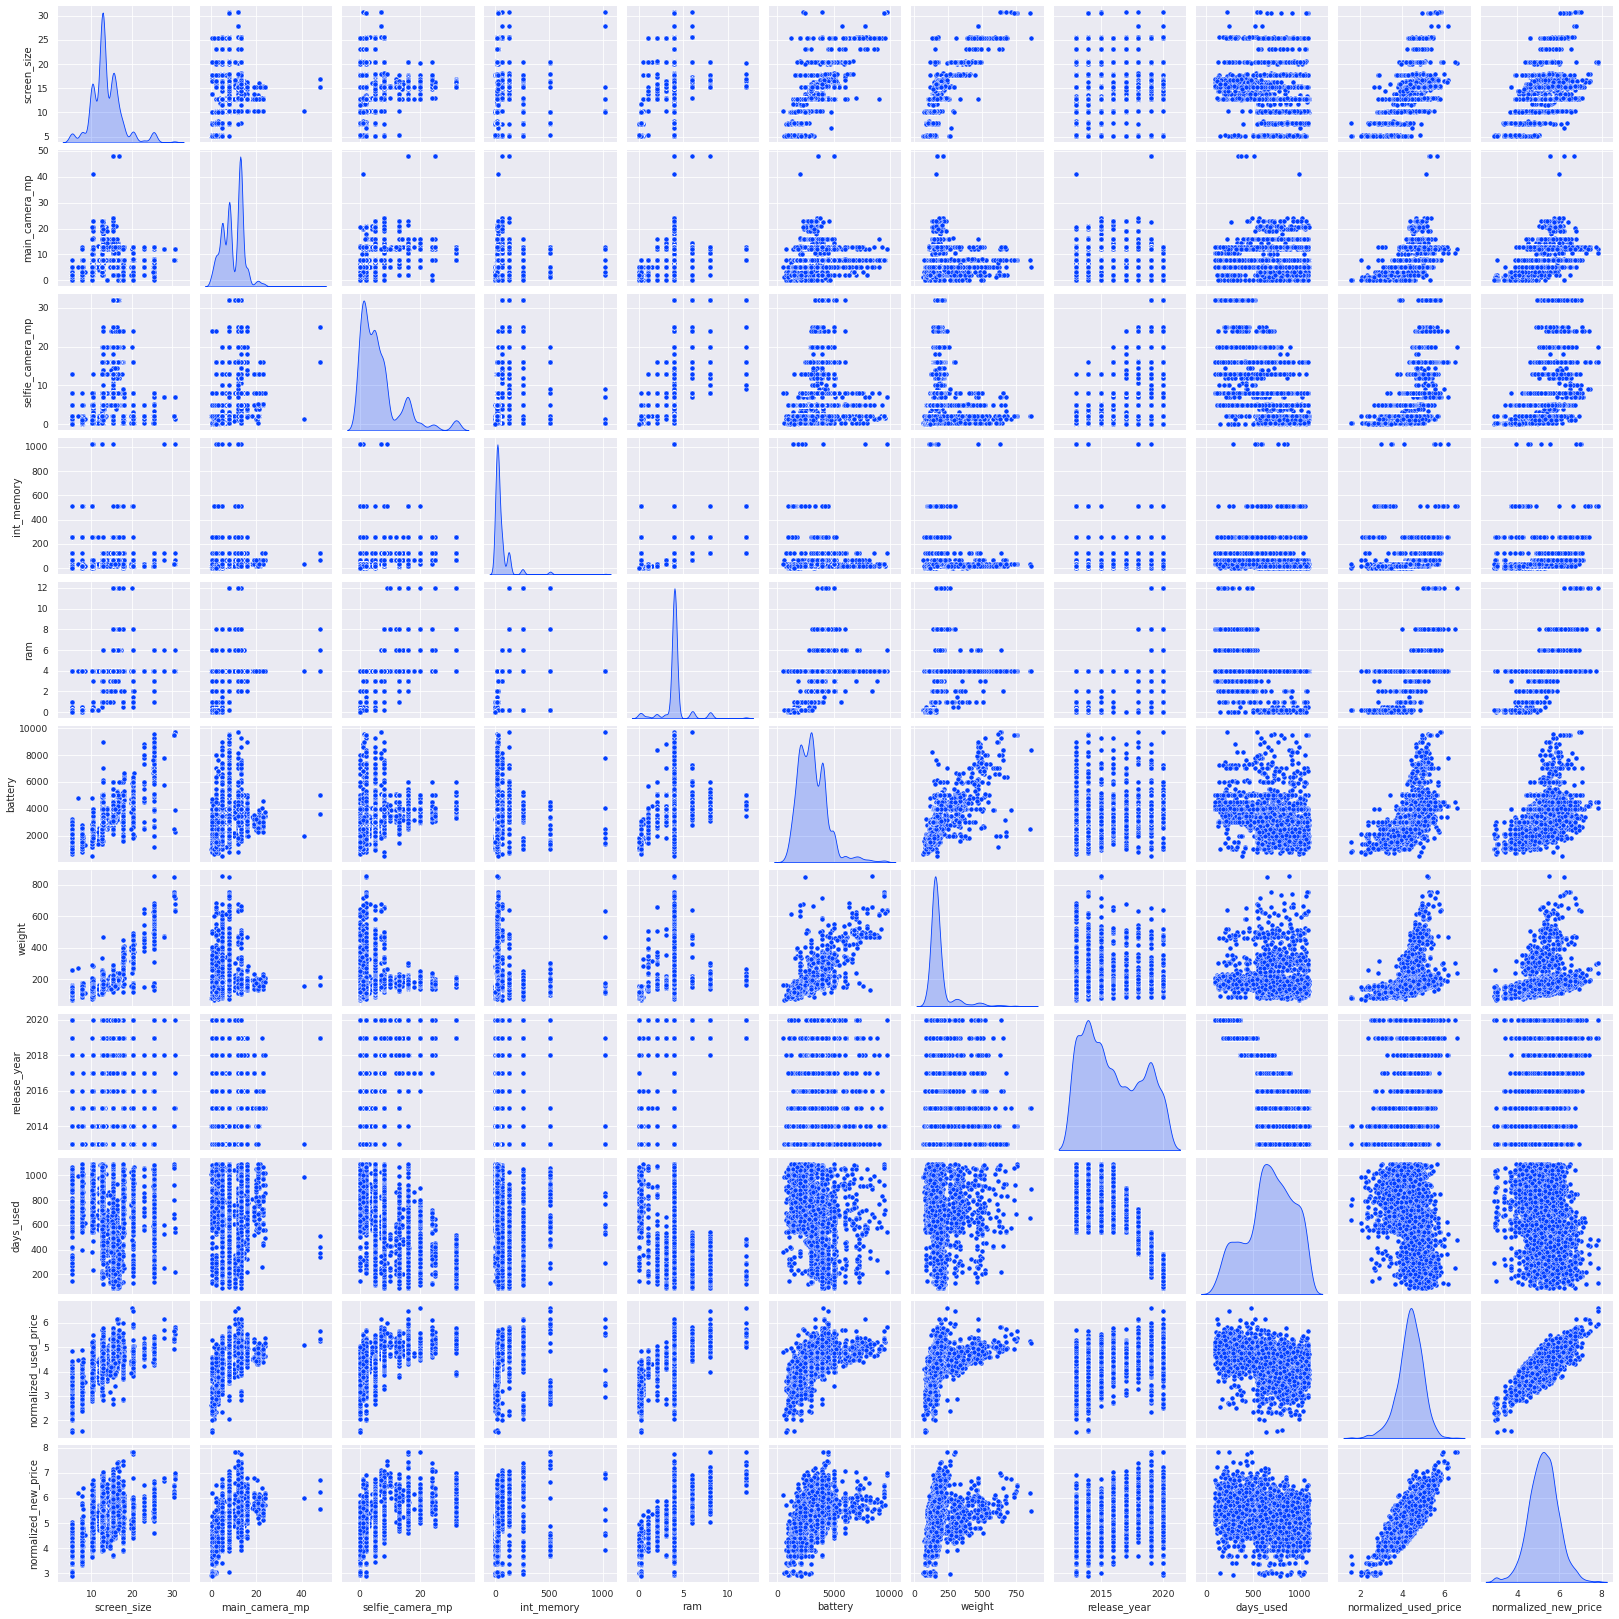

In [36]:
df_attr = df.iloc[:, 0:15]
sns.pairplot(
    df_attr, diag_kind="kde"
);  # to plot density curve instead of histogram on the diag

Question 1
1. What does the distribution of normalized used device prices look like?


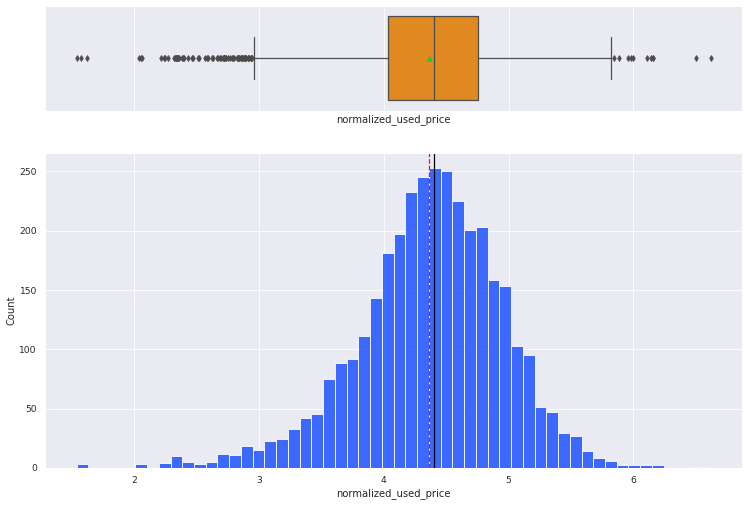

In [38]:
histogram_boxplot(df, 'normalized_used_price')

The distribution of normalized_used_price is close to normal but can said to be slightly left-skewed.

Question 2
2. What percentage of the used device market is dominated by Android devices?

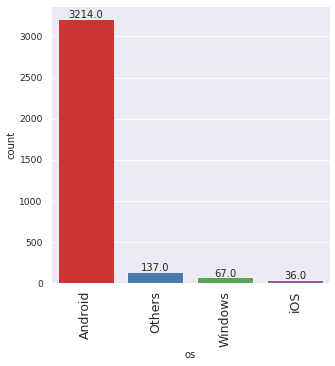

In [39]:
labeled_barplot(df, 'os')

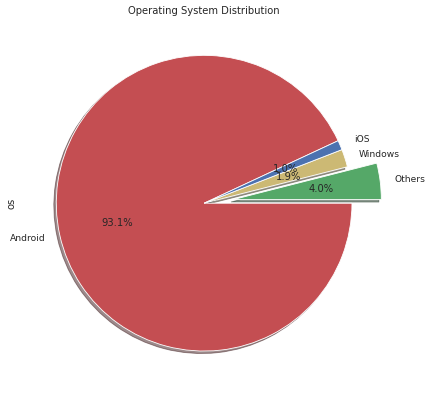

In [40]:
plt.figure(figsize=(10,8))
df['os'].value_counts(normalize=True).plot.pie(
    colors=['r','g','y','b'],startangle=25,shadow=True, explode=[0,0.2,0,0], autopct='%1.1f%%')
plt.title("Operating System Distribution")
plt.show()

Android makes up 93.1%, Others 4%, Windows 1.9%, iOS 1%


3. The amount of RAM is important for the smooth functioning of a device How does the amount of RAM vary with the brand?

In [41]:
#sorting ram by brand before plotting
sorted_ram = df.groupby(["brand_name"])["ram"].mean().sort_values().index

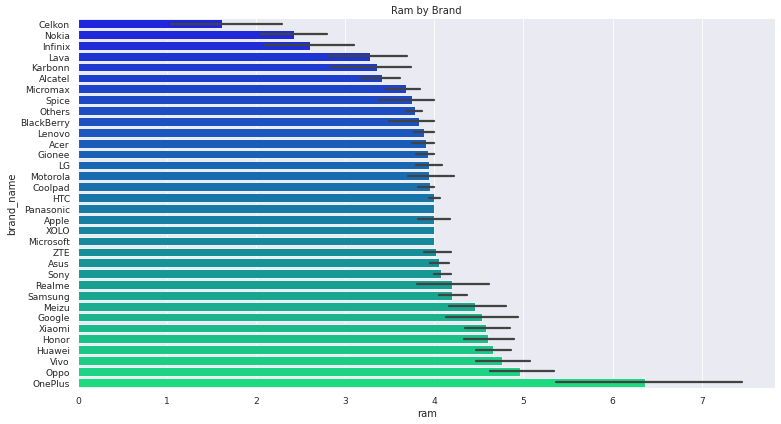

In [42]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='ram', y='brand_name', order=sorted_ram, palette='winter')
plt.title('Ram by Brand')
plt.show()

OnePlus has the highest ram, followed by Oppo, Vivo, and Huawei

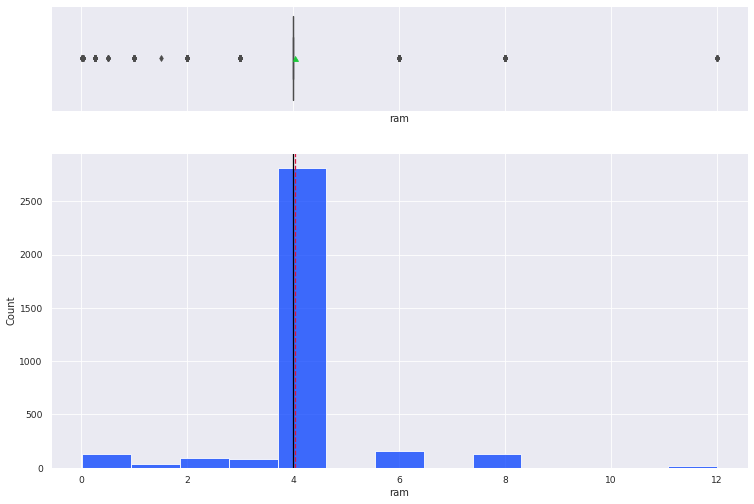

In [43]:
histogram_boxplot(df, 'ram')

Observations

- The majority of ram values are 4GB, which is also the mean, median.
- Outliers appear to be present; however, the values of outliers are most likely proper values.

Question 4

• A large battery often increases a device’s weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

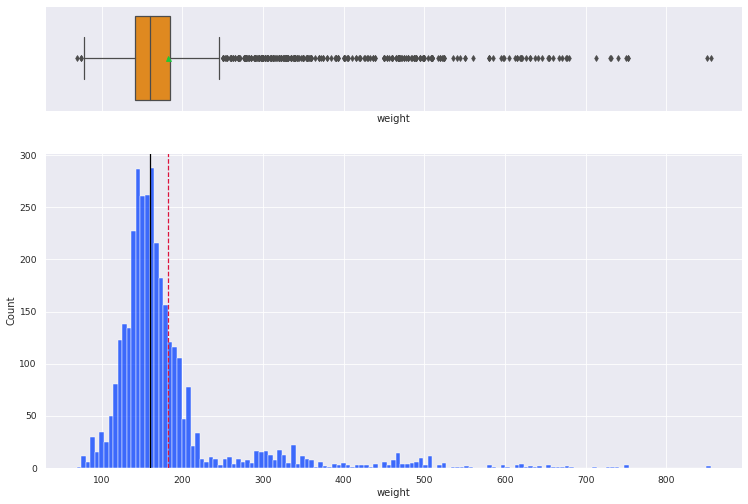

In [44]:
histogram_boxplot(df, "weight")

In [45]:
#taking log transformation of weight
df['log_weight'] = np.log(df['weight'])

Weight is highly right-skewed.  
By using log_transformation on weight, the distribution is more normal.
Log transformation of weight will be added as a feature to the dataset.

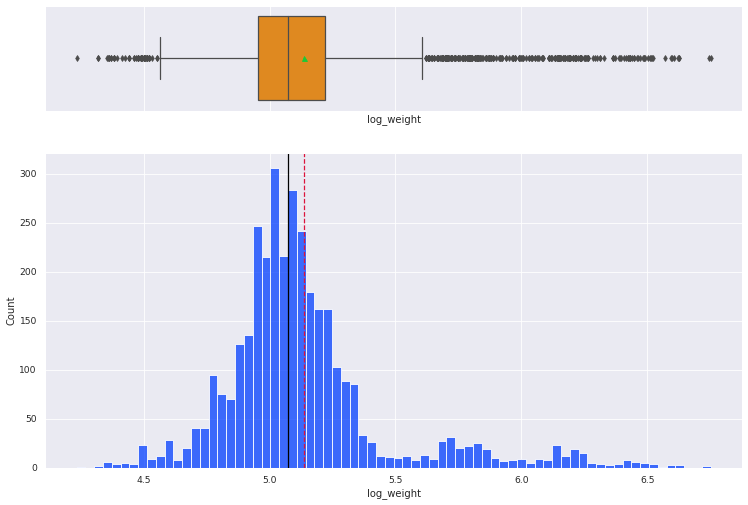

In [46]:
histogram_boxplot(df, 'log_weight')

In [47]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356


In [48]:
battery = df['battery']

In [49]:
#simple function to find total number of batteries heavier than 4500
greater_than_4500 = 0
k = 4500
for i in battery:
  if i > k:
    greater_than_4500 = greater_than_4500 + 1

print(greater_than_4500)

341


In [50]:
big_battery = df[df['battery'] > 4500]

In [51]:
big_battery.groupby("brand_name")["weight"].count().sort_values(ascending=False)

brand_name
Samsung      50
Others       41
Huawei       37
Xiaomi       31
Lenovo       28
Asus         22
Apple        17
Honor        14
Motorola     14
Vivo         13
LG           12
Realme       12
ZTE          10
Gionee       10
Acer          7
Infinix       6
Sony          6
Oppo          4
Nokia         1
Panasonic     1
Alcatel       1
Spice         1
HTC           1
Google        1
Micromax      1
Name: weight, dtype: int64

In [52]:
sorted_bat = df.groupby(["brand_name"])["battery"].mean().sort_values().index

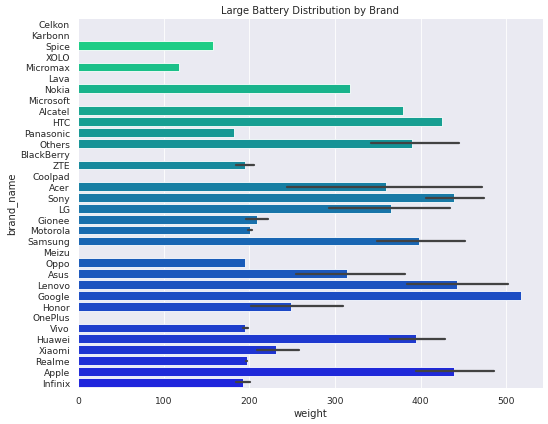

In [53]:
plt.figure(figsize=(10,8))
sns.barplot(data=big_battery, x='weight', y='brand_name',palette='winter_r', order=sorted_bat)
plt.title("Large Battery Distribution by Brand")
plt.show()

Google has the heaviest battery of all the devices.

In [54]:
big_battery.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356
11,Honor,Android,15.32,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,4.657383,4.770176,5.220356
19,Honor,Android,25.43,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,4.267878,5.517051,5.153292
20,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,4.556295,5.304001,5.153292


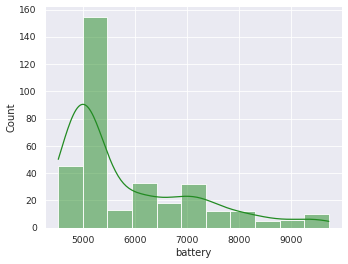

In [55]:
sns.histplot(data=big_battery, x='battery', color='forestgreen', kde=True);

The Distribution for batteries larger than 4500mAh is highly right-skewed with the majority of the big battery brands having a battery size of a little over 5000mAh.   

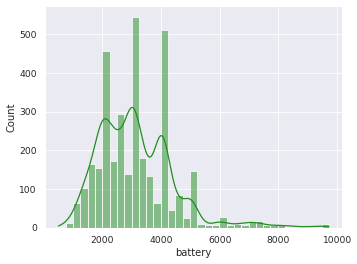

In [56]:
sns.histplot(data=df, x="battery", color='forestgreen', kde=True);

In [ ]:
df['battery'].skew()

1.332269994146739

<IPython.core.display.Javascript object>

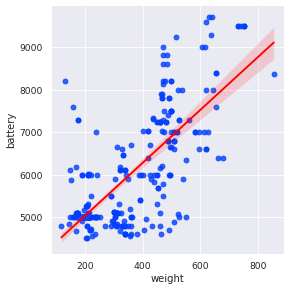

In [57]:
sns.lmplot(data=big_battery, y='battery', x='weight', line_kws={'color':'red'})

<Figure size 900x480 with 0 Axes>

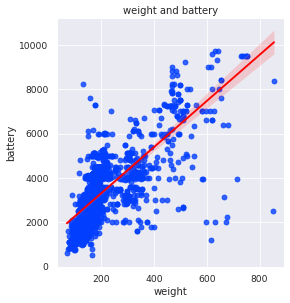

In [58]:
plt.figure(figsize=(15,8))
sns.lmplot(data=df, x='weight', y='battery', line_kws={'color':'red'})
plt.title('weight and battery')
plt.show()

Question 5.

• Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [59]:
screen_in_inches = df['screen_size']/2.54

In [60]:
df['screen_in_inches'] = screen_in_inches

In [61]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607,5.708661
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,6.811024
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,6.570866
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,10.039370
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,6.031496


In [62]:
df[(df.screen_in_inches>6)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,6.811024
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,6.570866
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,10.039370
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,6.031496
5,Honor,Android,16.23,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,4.413889,5.060694,5.170484,6.389764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3447,Apple,iOS,15.27,yes,no,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933,5.267858,6.011811
3448,Asus,Android,16.74,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,5.715316,7.059317,5.480639,6.590551
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872,5.247024,6.039370
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829,5.105945,6.220472


In [63]:
#function to get number of values greater than 6 inches
greater_than_6 = 0
k=6
for i in screen_in_inches:
  if i > k:
    greater_than_6=greater_than_6 + 1

print(greater_than_6)


1099


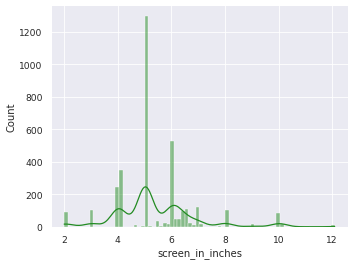

In [64]:
sns.histplot(data=df, x="screen_in_inches", color="forestgreen", kde=True)
plt.show()

In [65]:
greater_than_6 = df[df['screen_in_inches'] > 6]

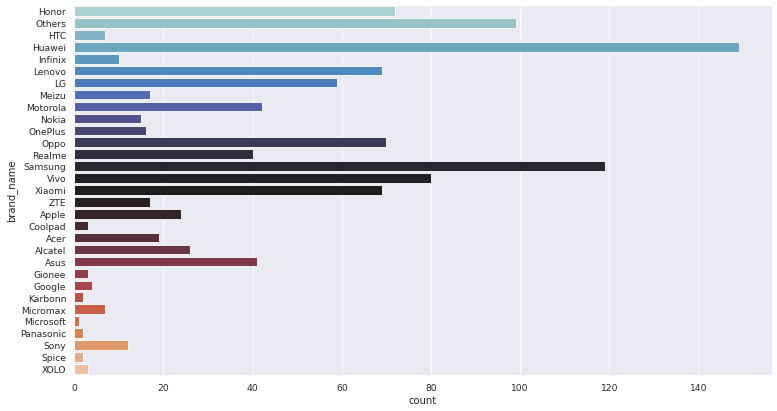

In [66]:
plt.figure(figsize=(15,8))
sns.countplot(data=greater_than_6, y='brand_name', palette='icefire',orient='horizontal');

- There are 1099 phones with screens greater than 6 inches


Question 6.

• A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?


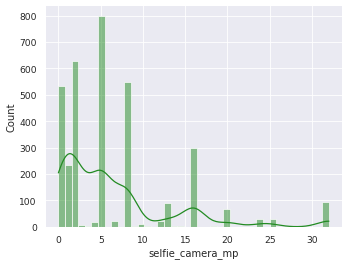

In [67]:
sns.histplot(data=df, x='selfie_camera_mp', kde=True, color='forestgreen')
plt.show()

- selfie_camera_mp if highly right-skewed, with the majority of devices having 5MP.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
 15  log_

In [69]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100,4.983607,5.708661
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018,5.361292,6.811024
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631,5.361292,6.570866
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961,6.173786,10.039370
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837,5.220356,6.031496


In [70]:
greater_than_8mp =  df[df['selfie_camera_mp'] > 8]

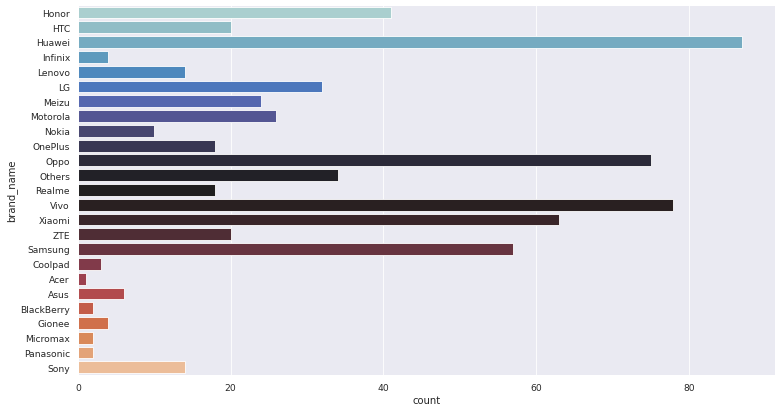

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(data=greater_than_8mp, y='brand_name', palette='icefire',orient='horizontal');

- Huawei has the most devices that have greater than 8MP with over 80
- Oppo and Vivo have the next highest with over approximately 75

7. Which attributes are highly correlated with the normalized price of a used device?

In [72]:
df2 = df.copy()

In [73]:
df2.corr()

<ipython-input-73-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,log_weight,screen_in_inches
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889,0.867585,1.000000
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655,0.000955,0.150316
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479,0.100526,0.271640
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992,0.040364,0.071291
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056,0.173883,0.274449
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754,0.755934,0.813533
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540,0.957744,0.828890
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689,0.182795,0.364223
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625,-0.151932,-0.291723
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496,0.489262,0.614785


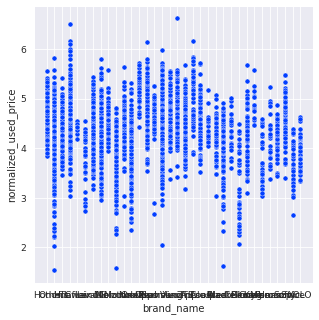

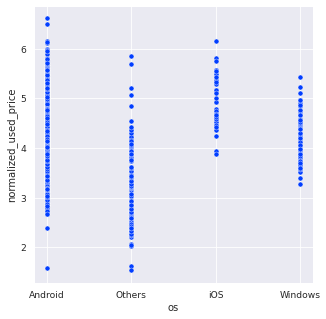

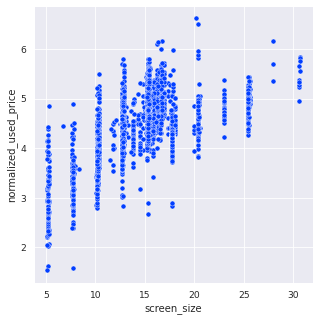

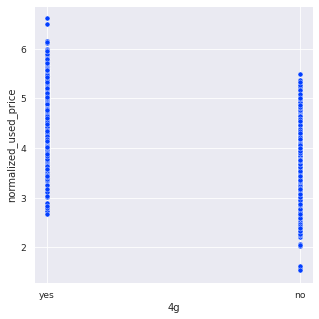

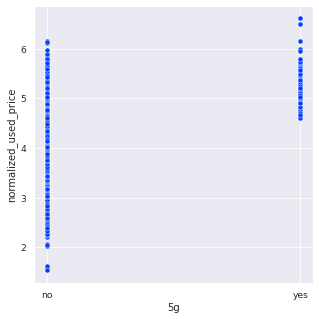

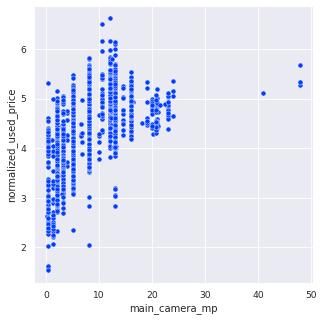

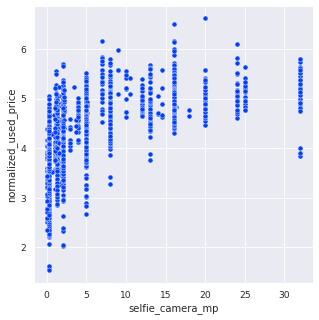

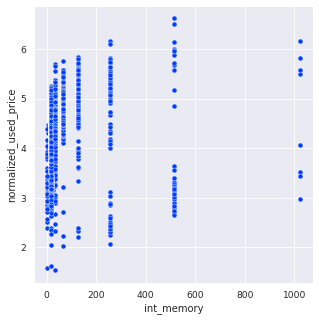

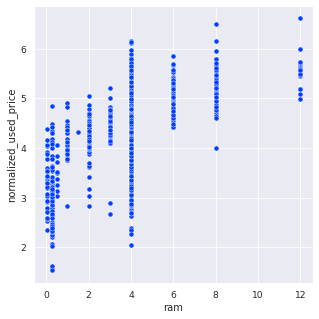

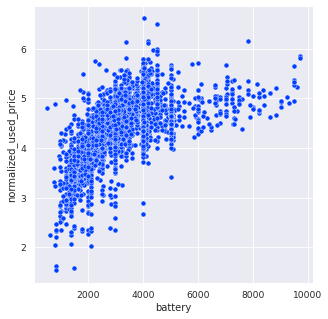

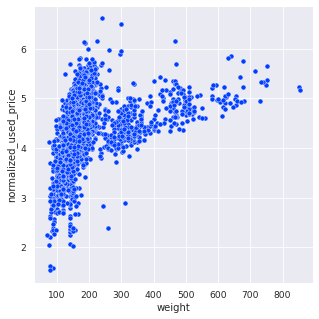

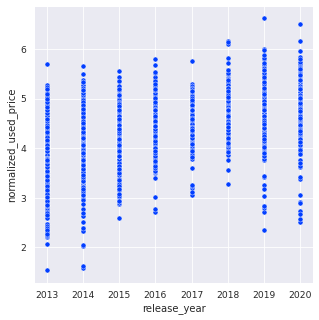

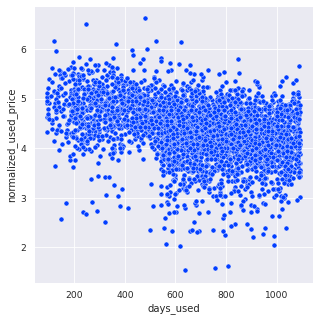

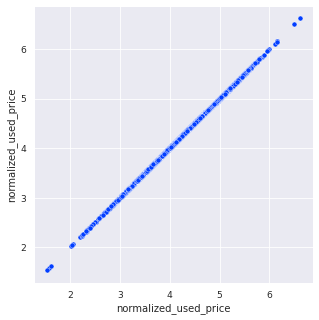

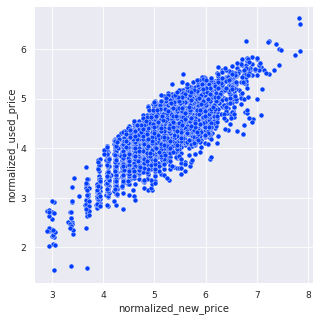

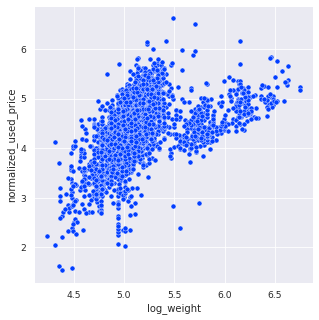

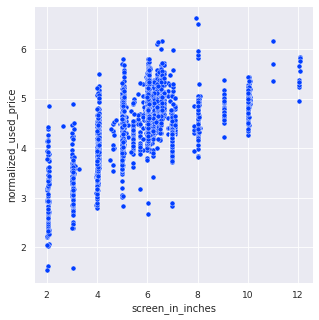

In [74]:


# let's plot the scatterplots of normalized used price with all the features

for i in df.columns:
    plt.figure(figsize=(6, 6))
    sns.scatterplot(data=df, x=i, y="normalized_used_price")
    plt.show()


<ipython-input-75-3486795fa5d5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfcorr = df.corr()


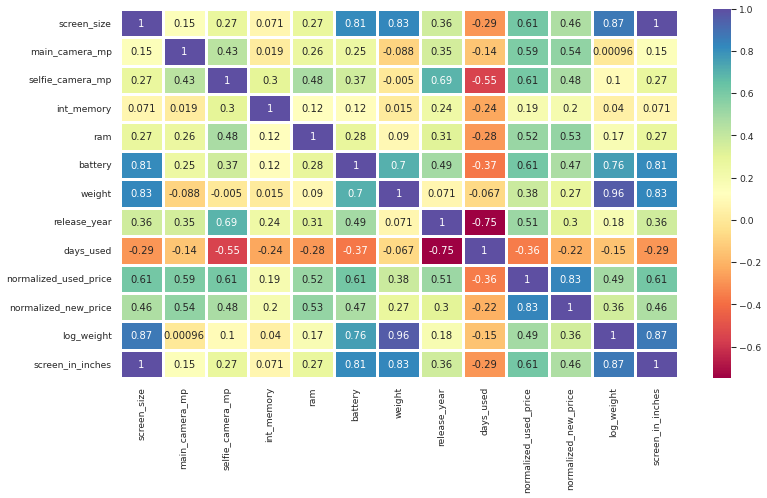

In [75]:
#heatmap of all variables including 2 new variables screen_in_inches and log_weight
plt.figure(figsize=(15,8))
dfcorr = df.corr()

linewidths = 1.5
linecolor = "white"
cmap='Spectral'

# plotting the heatmap
hm = sns.heatmap(data=dfcorr,
                linewidths=linewidths,
                linecolor=linecolor,
                cmap=cmap,
                annot=True
                 )

# displaying the plotted heatmap
plt.show()


- Normalized new price has the highest correlation with normalized used price.  
- Days_used has the only negative correlation with normalized used price.

• There is a strong, negative correlation between used_price and days_used.  This is understandable, as the longer one uses the same device the lower in value it falls.

• There is a strong, positive correlation of new and used price.  
• A fairly strong, positive correlation exists among used_price and screen_size, main_camera_mp, selfie_camera_mp, battery, and RAM.

• Interestingly, release year has a stronger, positive relationship with used price than it does with new price.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [76]:
#Copy of dataset with log_value, log_weight and screen_in_inches columns
df2 = df.copy()

In [77]:
#second copy of dataset in case of mistakes
df5 = df.copy()

In [78]:
df5 = original.copy()

In [79]:
df5.columns


Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

In [80]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

###Missing Value Treatment

In [81]:
#checking missing values
df5.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Using median to replace missing values, grouping by brand name and operating system.



In [82]:
#Grouping by os and brand name and taking median of each feature to fill missing values
df5["selfie_camera_mp"] = df5["selfie_camera_mp"].fillna(
    value=df5.groupby(["brand_name","os"])["weight"].transform("median")
)


df5["main_camera_mp"] = df5["main_camera_mp"].fillna(
    value=df5.groupby(["brand_name","os"])["main_camera_mp"].transform("median")
)
df5["int_memory"] = df5["int_memory"].fillna(
    value=df5.groupby(["brand_name","os"])["int_memory"].transform("median")
)

In [83]:
df5["ram"] = df5["ram"].fillna(
    value = df5.groupby(["brand_name","os"])["ram"].transform("median")
  )
df5["battery"] = df5["battery"].fillna(
    value=df5.groupby(["brand_name","os"])["battery"].transform("median")
  )
df5["weight"] = df5["weight"].fillna(
    value=df5.groupby(["brand_name","os"])["weight"].transform("median")
  )



10 null values remain after using median to replace nulls
We will view the remaining 10

In [84]:
df5.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [85]:
df5[df5.isnull().any(axis=1)]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
59,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,245,4.282068,4.597642
60,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.363608,4.711780
61,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,256,4.181439,4.505460
62,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,316,4.555244,4.602166
63,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,468,4.416670,4.871297
278,Infinix,Android,17.32,yes,no,NaN,8.0,32.0,2.0,6000.0,209.0,2020,320,4.405133,4.605370
279,Infinix,Android,15.39,yes,no,NaN,8.0,64.0,4.0,5000.0,185.0,2020,173,4.495913,4.702115
280,Infinix,Android,15.39,yes,no,NaN,8.0,32.0,2.0,5000.0,185.0,2020,329,4.370713,4.487287
281,Infinix,Android,15.39,yes,no,NaN,16.0,32.0,3.0,4000.0,178.0,2019,356,4.417997,4.605970
282,Infinix,Android,15.29,yes,no,NaN,16.0,32.0,2.0,4000.0,165.0,2019,497,4.423289,4.866072


Dropping the remianing 10 missing values.

In [86]:
df5.dropna(inplace=True)

In [87]:
df5.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [88]:
df5.shape

(3444, 15)

In [89]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3444 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3444 non-null   object 
 1   os                     3444 non-null   object 
 2   screen_size            3444 non-null   float64
 3   4g                     3444 non-null   object 
 4   5g                     3444 non-null   object 
 5   main_camera_mp         3444 non-null   float64
 6   selfie_camera_mp       3444 non-null   float64
 7   int_memory             3444 non-null   float64
 8   ram                    3444 non-null   float64
 9   battery                3444 non-null   float64
 10  weight                 3444 non-null   float64
 11  release_year           3444 non-null   int64  
 12  days_used              3444 non-null   int64  
 13  normalized_used_price  3444 non-null   float64
 14  normalized_new_price   3444 non-null   float64
dtypes: f

Outlier Detection

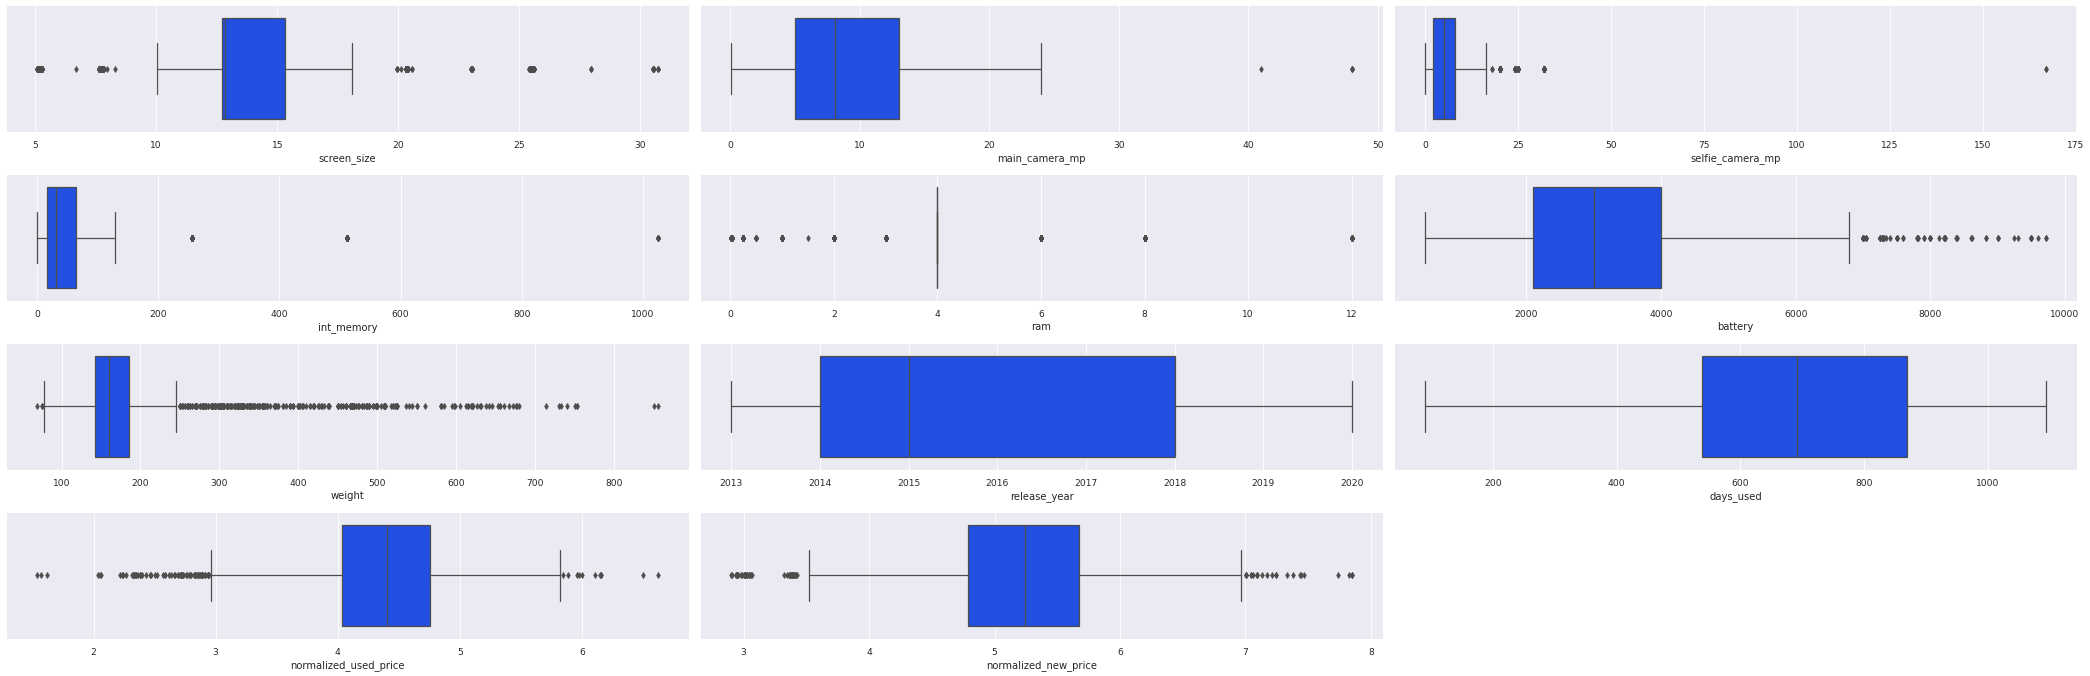

In [90]:
num_cols = df5.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(35, 25))

for i, variable in enumerate(num_cols):
    plt.subplot(9, 3, i + 1)
    sns.boxplot(data=df5, x=variable)
    plt.tight_layout()

plt.show()



*   All features have outliers except for release_year and days_used.
*   Many of the outliers in the variables appear to be proper values.
*   We will cap the values for log_weight, screen_in_inches, and selfie_camera_mp using IQR.





In [91]:
#Using cap method for outliers with IQR


upper_limit = df5['int_memory'].mean() + 3*df5['int_memory'].std()
lower_limit = df5['int_memory'].mean() - 3*df5['int_memory'].std()

upper_limit = df5['selfie_camera_mp'].mean() + 3*df5['selfie_camera_mp'].std()
lower_limit = df5['selfie_camera_mp'].mean() - 3*df5['selfie_camera_mp'].std()



In [92]:
df5['int_memory'] = np.where(
    df5['int_memory']>upper_limit,
    upper_limit,
    np.where(
        df5['int_memory']<lower_limit,
        lower_limit,
        df5['int_memory']
    )
)

In [93]:
df5['selfie_camera_mp'] = np.where(
    df5['selfie_camera_mp']>upper_limit,
    upper_limit,
    np.where(
        df5['selfie_camera_mp']<lower_limit,
        lower_limit,
        df5['selfie_camera_mp']
    )
)

## Data Preparation

changing Categorical features to numeric

In [94]:
#Changing 4g, 5g, and os to numeric
from sklearn.preprocessing import LabelEncoder

df5 = pd.get_dummies(df5, columns=['os'], prefix=['os'])
df5 = pd.get_dummies(df5, columns=['4g'], prefix=['4g'])
df5 = pd.get_dummies(df5, columns=['5g'], prefix=['5g'])



In [95]:
df5.info

<bound method DataFrame.info of      brand_name  screen_size  main_camera_mp  selfie_camera_mp  int_memory  \
0         Honor        14.50            13.0               5.0   30.547331   
1         Honor        17.30            13.0              16.0   30.547331   
2         Honor        16.69            13.0               8.0   30.547331   
3         Honor        25.50            13.0               8.0   30.547331   
4         Honor        15.32            13.0               8.0   30.547331   
...         ...          ...             ...               ...         ...   
3449       Asus        15.34            13.0               8.0   30.547331   
3450       Asus        15.24            13.0               8.0   30.547331   
3451    Alcatel        15.80            13.0               5.0   30.547331   
3452    Alcatel        15.80            13.0               5.0   30.547331   
3453    Alcatel        12.83            13.0               5.0   16.000000   

      ram  battery  weight  rel

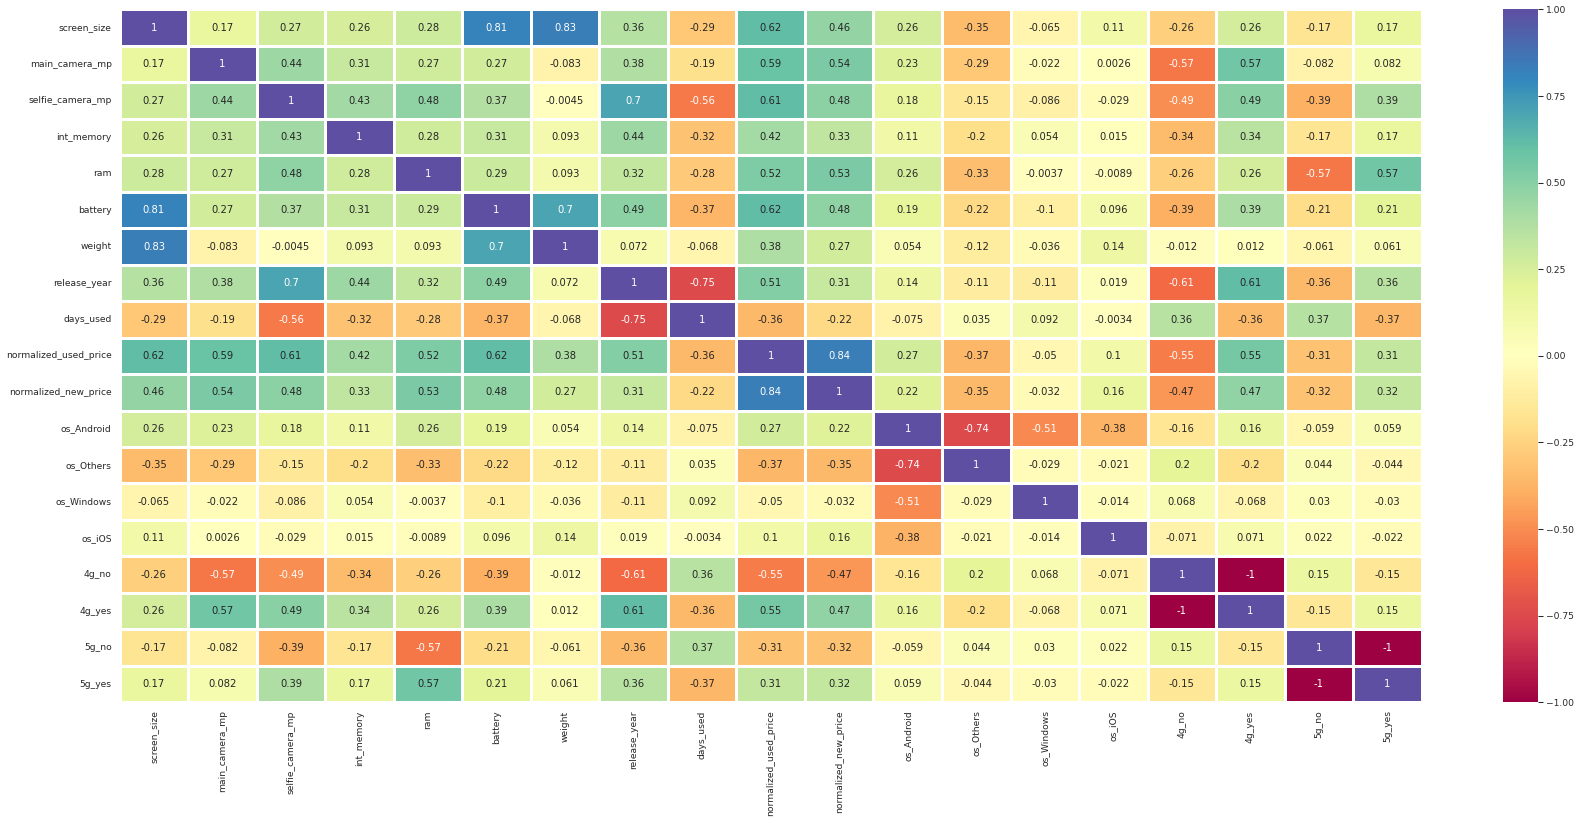

In [96]:
#Heatmap of all features
plt.figure(figsize=(35,15))
dfcorr = df5.drop(['brand_name'],axis=1).corr()

linewidths = 1.5
linecolor = "white"
cmap='Spectral'

# plotting the heatmap
hm = sns.heatmap(data=dfcorr,
                linewidths=linewidths,
                linecolor=linecolor,
                cmap=cmap,
                annot=True
                 )

# displaying the plotted heatmap
plt.show()

In [97]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3444.0,13.707184,3.808973,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3444.0,9.628101,4.756597,0.080000,5.000000,8.100000,13.000000,48.000000
selfie_camera_mp,3444.0,6.515024,6.853012,0.000000,2.000000,5.000000,8.000000,30.547331
int_memory,3444.0,24.564009,7.697521,0.010000,16.000000,30.547331,30.547331,30.547331
ram,3444.0,4.035627,1.370273,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3444.0,3127.271341,1297.572647,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3444.0,182.634640,88.484866,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3444.0,2015.954704,2.293263,2013.000000,2014.000000,2015.000000,2018.000000,2020.000000
days_used,3444.0,675.919570,248.112174,91.000000,537.750000,691.000000,870.000000,1094.000000
normalized_used_price,3444.0,4.364635,0.589742,1.536867,4.033400,4.405072,4.757934,6.619433


In [98]:
df5.columns


Index(['brand_name', 'screen_size', 'main_camera_mp', 'selfie_camera_mp',
       'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used',
       'normalized_used_price', 'normalized_new_price', 'os_Android',
       'os_Others', 'os_Windows', 'os_iOS', '4g_no', '4g_yes', '5g_no',
       '5g_yes'],
      dtype='object')

####Note:  Log_weight and screen_in_inches were dropped as they were producing either Nan or inf for VIF and MAPE values.

In [99]:
#Defining X and y variables
X = df5.drop(['brand_name','normalized_used_price'], axis=1)

y = df5["normalized_used_price"]

In [100]:
print(X.head())
print()
print(y.head())

   screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  battery  \
0        14.50            13.0               5.0   30.547331  3.0   3020.0   
1        17.30            13.0              16.0   30.547331  8.0   4300.0   
2        16.69            13.0               8.0   30.547331  8.0   4200.0   
3        25.50            13.0               8.0   30.547331  6.0   7250.0   
4        15.32            13.0               8.0   30.547331  3.0   5000.0   

   weight  release_year  days_used  normalized_new_price  os_Android  \
0   146.0          2020        127              4.715100           1   
1   213.0          2020        325              5.519018           1   
2   213.0          2020        162              5.884631           1   
3   480.0          2020        345              5.630961           1   
4   185.0          2020        293              4.947837           1   

   os_Others  os_Windows  os_iOS  4g_no  4g_yes  5g_no  5g_yes  
0          0           0       0 

In [101]:
#Adding constant
X = sm.add_constant(X)

In [102]:
#dummy variables for categorical features changed to numeric
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,

)

X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,os_Android,os_Others,os_Windows,os_iOS,4g_no,4g_yes,5g_no,5g_yes
0,1.0,14.50,13.0,5.0,30.547331,3.0,3020.0,146.0,2020,127,4.715100,1,0,0,0,0,1,1,0
1,1.0,17.30,13.0,16.0,30.547331,8.0,4300.0,213.0,2020,325,5.519018,1,0,0,0,0,1,0,1
2,1.0,16.69,13.0,8.0,30.547331,8.0,4200.0,213.0,2020,162,5.884631,1,0,0,0,0,1,0,1
3,1.0,25.50,13.0,8.0,30.547331,6.0,7250.0,480.0,2020,345,5.630961,1,0,0,0,0,1,0,1
4,1.0,15.32,13.0,8.0,30.547331,3.0,5000.0,185.0,2020,293,4.947837,1,0,0,0,0,1,1,0


In [103]:
#Splitting the data 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [104]:
#Getting the rows in the training and test data
print("The number of rows in the training data =", X_train.shape[0])
print("The number of rows in the test data =", X_test.shape[0])

The number of rows in the training data = 2410
The number of rows in the test data = 1034


## Model Building - Linear Regression

In [105]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.851
Model:                               OLS   Adj. R-squared:                  0.850
Method:                    Least Squares   F-statistic:                     912.0
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           05:02:43   Log-Likelihood:                 132.12
No. Observations:                   2410   AIC:                            -232.2
Df Residuals:                       2394   BIC:                            -139.6
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:

1.   Adjusted R-squared:
        - Indicates the fit of the model, and value ranges from 0 to 1, with a higher number indicating a better fit.  
        - The Adjusted R-squared for this model is **0.852**
2.   Constant Coefficient (y-intercept):
        - Represents the y-intercept and it indicates the expected output given that all the predictor variable coefficients are equal to zero.  
        - The constant coefficient is : **-17.535**




## Model Performance Check

In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [107]:
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance
    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
{
"RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
},
index=[0], )
    return df_perf

In [108]:
print("Training Performance:")
olsmodel_tr_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_tr_perf

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229063,0.179457,0.851062,0.849878,4.323416


In [109]:
print("Test Performance:")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.244427,0.189854,0.822626,0.819302,4.54538


Observations:
- The adjusted R-squared value for the training set is **0.847**so the model is not underfitting. as the R-squared for the test is **0.813**
- The train and test RMSE are comparable so it is not overfitting either.
- The MAE on the test data suggests the model can predict within  **4.58**

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

###1. NO MULTICOLLINEARITY

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [111]:
checking_vif(X_train)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000
1,screen_size,7.107790
2,main_camera_mp,2.032507
3,selfie_camera_mp,2.586831
4,int_memory,1.377433
5,ram,2.085449
6,battery,3.902949
7,weight,5.554237
8,release_year,4.712305
9,days_used,2.432784


Observations:

- There are 2 columns with p-value greater than 5, which means multicollinearity is present.
- log_weight, weight, and screen_size are the columns with VIF greater than 5.
- To address the issue we must drop the columns that have p-value greater than 5.
- We will disregard the VIF values for dummy variables as well as the constant.


####Removing Multicolliearity

Formula for multicollinearity

In [112]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

Checking the result dropping has on the performance of the model.

In [113]:
col_list = ["weight", "screen_size"]

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.846348,0.232708
1,screen_size,0.846261,0.232774


Dropping log_weight as this was an added feature

In [114]:
col_to_drop = "weight"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,const,0.000000
1,screen_size,3.538551
2,main_camera_mp,1.955010
3,selfie_camera_mp,2.548999
4,int_memory,1.374836
5,ram,2.080054
6,battery,3.621668
7,release_year,4.578345
8,days_used,2.420923
9,normalized_new_price,2.610392




*   The multicollinearity has been addressed.
*   Next, the model will be rebuilt to reflect the changes.



In [115]:
#rebuilding model after dropping high VIF feature
olsmodel1 = sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     948.8
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           05:03:20   Log-Likelihood:                 101.59
No. Observations:                   2410   AIC:                            -173.2
Df Residuals:                       2395   BIC:                            -86.37
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

Observations:
- Multicollinearity has been addressed after dropping the weight feature.
- Adj. R-squared is **0.846** after removing multicollinearity.
- The adjusted R-squared did not drop much at all after removing the high VIF feature, which means that the weight feature didn't have much of an effect on the model.

Addressing p-values:
- After removing multicollinearity, the next step is to address p-values.
- We will drop features with p-values greater than 0.05, but will drop them one by one instead of all at once.
- A model will be rebuilt after dropping each feature with p-value greater than 0.05 and will repeat this until no features have p-values greater than 0.05.

Each independent feature has a null and alternate hypothesis:

  - **Null Hypothesis**: Independent feature is not significant.
  - **Alternate Hypothesis**: Independent feature is significant.
  - Test performed considering a 0.05 or 5% significance level, with a p-value less than 0.05 is considered statistically significant.

In [116]:
# initial list of columns
predictors = X_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'normalized_new_price', 'os_Android', 'os_Others', 'os_Windows', 'os_iOS', '4g_no', '4g_yes', '5g_no', '5g_yes']


int_memory and days_used were dropped since they had values larger than 0.05.

In [117]:
#Checking model now that features with high p-values have been removed
olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     948.8
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           05:03:34   Log-Likelihood:                 101.59
No. Observations:                   2410   AIC:                            -173.2
Df Residuals:                       2395   BIC:                            -86.37
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [118]:
print("Training Performance")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231983,0.181584,0.847241,0.846091,4.374579


In [119]:
print("Test Performance")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.245391,0.191064,0.821224,0.818054,4.573688


Observations:

- All features have p-values less than 0.05.
- The features in the x_train3 will be the final set of predictors.
- olsmodel2 will be the final model.
- There are still some tests that need to be performed however.


* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.717, i.e., our model is able to explain ~72% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.717

###2. TEST FOR LINEARITY AND INDEPENDENCE

- To test for linearity and independence, the fitted values and the residuals will be plotted.
- As long as the plotted values do not follow a pattern, then the model can be declared linear.
- It is important that residuals are independent, as the confidence intervals of the coefficient estimations will be narrower which can lead to incorrect conclusions of a parameter being deemed statistically significant.

In [120]:
df_pred_values = pd.DataFrame()

df_pred_values["Actual Values"] = y_train
df_pred_values["Fitted Values"] = olsmodel2.fittedvalues
df_pred_values["Residuals"] = olsmodel2.resid

df_pred_values.head()

,Actual Values,Fitted Values,Residuals
1362,3.735524,3.666545,0.068980
3325,4.435567,4.298548,0.137020
1447,4.540205,4.321675,0.218530
3372,4.799091,4.809314,-0.010223
2415,5.091293,4.760176,0.331117


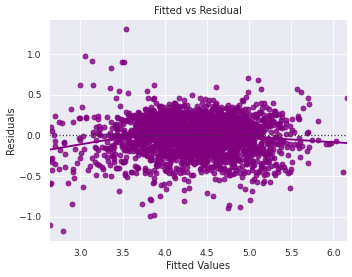

In [121]:
sns.residplot(
    data=df_pred_values, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual")
plt.show()

No pattern is present, so this model pasts the test for linearity and independence.

###3. NORMALITY TEST

There are 3 ways that will be used to test for normality.  To check if the residuals are normally distributed, we will use the following:

  1. Histogram
  2. Q-Q plot
  3. Shapiro-Wilks Test



#####Histogram

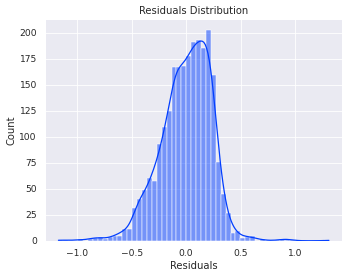

In [122]:
#plotting the residuals on histogram to see if the distribution is bell-shaped or normal
sns.histplot(data=df_pred_values, x="Residuals", kde=True)
plt.title("Residuals Distribution")
plt.show()

- The distribution of the Residuals is bell-shaped.  
- Next, the qqplot will be used to check

#####Q-Q plot

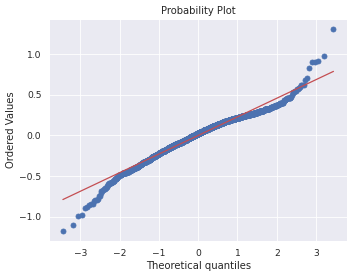

In [123]:
#plotting residuals on qqplot to test normality
import pylab
import scipy.stats as stats
stats.probplot(df_pred_values["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

#####Shapiro-Wilks Test

In [124]:
stats.shapiro(df_pred_values["Residuals"])

ShapiroResult(statistic=0.9739912748336792, pvalue=1.5523684015498465e-20)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

###TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

* The goldfeldquandt test will be used to check for Homoscedasticity. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

In [125]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred_values["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 0.9960957286599754), ('p-value', 0.5268919352558199)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [126]:
# predictions on the test set
pred = olsmodel2.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1271,4.921804,4.818024
2947,5.076361,5.048458
1188,4.703295,4.793562
3219,5.268528,5.151660
2250,3.467921,3.839819
259,4.978869,5.432832
3335,5.245286,5.128574
1202,4.048650,4.469402
2956,4.653675,4.575532
2815,4.973418,4.871284


## Final Model

In [127]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [128]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.847
Model:                               OLS   Adj. R-squared:                  0.846
Method:                    Least Squares   F-statistic:                     948.8
Date:                   Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                           05:04:15   Log-Likelihood:                 101.59
No. Observations:                   2410   AIC:                            -173.2
Df Residuals:                       2395   BIC:                            -86.37
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [129]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231983,0.181584,0.847241,0.846091,4.374579


In [130]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.245391,0.191064,0.821224,0.818054,4.573688


## Actionable Insights and Recommendations

- Our model can explain 84.6% of the variance in the training set and 81.8% of the variance in the test set.
  -This indicates that the model is good for prediction as well as inference purposes.
- The train and test RMSE and MAE are low and comparable.  
- The model did fail on the Shapiro-Wilks, but it passed on the qqplot and the bell-shaped distribution using the histogram.  
- internal memory and battery did not have any influence on the price of the phone.  
- Weight hardly had any influence on the price as well.
- If normalized new price increase by one unit or euro, then the used price will increase by **0.4271**.
- Besides normalized used price, RAM and selfie camera MP had the most influence in the price of a used device.  


___

In [132]:
%%shell
jupyter nbconvert --to html /content/WalterEfird_LinearRegression.ipynb

[NbConvertApp] WARNING | pattern '/content/WalterEfird_LinearRegression.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answ

CalledProcessError: ignored